<a href="https://colab.research.google.com/github/zzhining/python_ml_dl2/blob/main/answer/8_1_mnist_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 불러오기


In [2]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# 파이썬 랜덤 시드 설정
random.seed(42)

# NumPy 랜덤 시드 설정
np.random.seed(42)

# TensorFlow 시드 설정
tf.random.set_seed(42)


# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 구조 확인
print("X_train:{}, Y_train:{}\nX_test:{}, Y_test:{}"\
      .format(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape))

X_train:(60000, 28, 28), Y_train:(60000,)
X_test:(10000, 28, 28), Y_test:(10000,)


# 문제1
불러온 MNIST 데이터 셋의 가장 마지막 값을 이미지로 시각화하여 표시하시오.

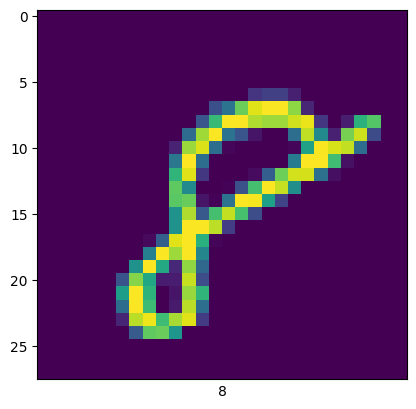

In [3]:
import matplotlib.pyplot as plt

# 가장 마지막에 담겨있는 데이터를 이미지로 출력하기
plt.imshow(X_train[-1])
plt.xlabel(Y_train[-1])
plt.xticks([])
plt.show()

<참고> 25개의 데이터를 레이블과 함께 출력하기

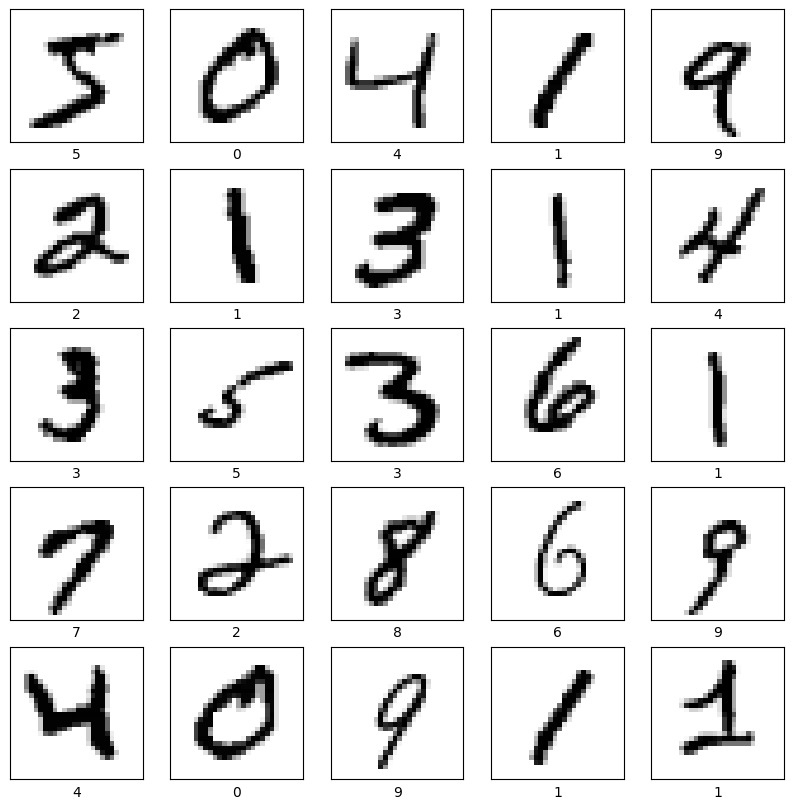

In [4]:
import matplotlib.pyplot as plt

# 상위 25개 데이터를 레이블과 함께 출력하기
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    # 숫자 이미지 출력
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    # 레이블 출력
    plt.xlabel(Y_train[i])
plt.show()

# 문제2
불러온 데이터의 특징(`X_train`, `X_test`) 변수의 전처리를 수행하시오.
-	스케일링: 데이터의 분포를 [0, 1] 사이로 조정
-	차원 변경: 4개의 차원(`num_images`, `width`, `height`, `channel`)의 값을 갖도록 변경


In [5]:
# 스케일링
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# 차원 변경 전 데이터 구조
print(X_train.shape)
# 차원 변경
X_train = X_train.reshape(X_train.shape[0],
                          X_train.shape[1],
                          X_train.shape[2],
                          1)
X_test = X_test.reshape(X_test.shape[0],
                        X_test.shape[1],
                        X_test.shape[2],
                        1)
# 차원 변경 후 데이터 구조
print(X_train.shape, X_test.shape)

(60000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [7]:
import numpy as np
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# 문제3
불러온 데이터의 타겟 변수(`Y_train`, `Y_test`)의 전처리를 수행하시오.
-	`Y_train`의 유일값을 확인
-	원 핫 벡터 변환: `Y_train`, `Y_test`

In [8]:
import numpy as np
# Y_train의 유일값을 확인
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
from tensorflow.keras.utils import to_categorical

# 원핫벡터 형태로 변환
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [10]:
Y_train[-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

# 문제4
다음과 같이 신경망을 구성하시오.
-	Conv1: kernel = (3, 3), filters = 32
-	Conv2: kernel = (3, 3), filters = 64
-	Pool: MaxPooling, pool_size = 2, dropout: 25%
-	FC1: 128, dropout: 50%

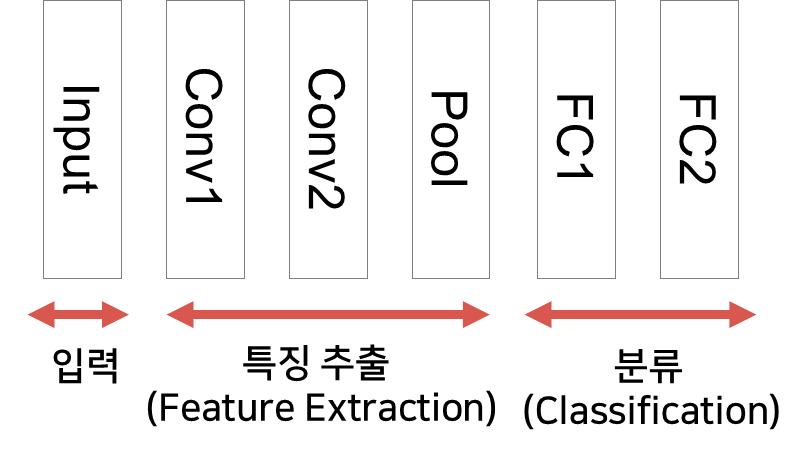

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

# CNN 모델 설계
model = Sequential()
# Conv1
model.add(Conv2D(32, kernel_size=(3, 3),
                 input_shape=(28, 28, 1),
                 activation='relu',
                 name = 'Conv1'))
# Conv2
model.add(Conv2D(64, (3, 3),
                 activation='relu',
                 name = 'Conv2'))
# Pool
model.add(MaxPooling2D(pool_size=2, name = 'Pool'))
model.add(Dropout(0.25))
# FC1
model.add(Flatten())
model.add(Dense(128,  activation='relu', name = 'FC1'))
model.add(Dropout(0.5))
# FC2
model.add(Dense(10, activation='softmax',name = 'FC2'))

# 모델 컴파일 – 손실함수, 옵티마이저, 평가 메트릭 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 문제5
모델의 summary 정보를 확인하여 생성된 신경망의 구조를 확인하시오

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool (MaxPooling2D)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC1 (Dense)                          │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC2 (Dense)                          │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

# 문제6
문제4에서 생성한 모델의 학습을 수행하시오.
-	학습 시, `val_loss` 값을 모니터링하여 5회 이상 성능이 개선되지 않을 경우 학습의 이른 종료를 수행할 것
-	학습 데이터의 20%는 검증용 데이터로 할당
-	배치 사이즈: 256, 에포크: 50


<힌트>
```
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
```

In [13]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 학습 결과를 저장하기 위한 환경 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath="./model/{epoch:02d}-{val_loss:.2f}.keras"

# 학습 중 모니터링 할 조건 설정
checkpointer = ModelCheckpoint(filepath=modelpath,
                               monitor='val_loss',
                               verbose=1,
                               save_best_only=True)

# 학습의 이른 종료를 위한 조건 설정
early_stopping_callback = EarlyStopping(monitor='val_loss',
                                        patience=10)
# 학습
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=30, batch_size=200, verbose=1,
                    callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Epoch 1/30
296/300 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8319 - loss: 0.5379
Epoch 1: val_loss improved from inf to 0.05431, saving model to ./model/01-0.05.keras
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8333 - loss: 0.5333 - val_accuracy: 0.9829 - val_loss: 0.0543
Epoch 2/30
297/300 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9741 - loss: 0.0900
Epoch 2: val_loss improved from 0.05431 to 0.04154, saving model to ./model/02-0.04.keras
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9742 - loss: 0.0900 - val_accuracy: 0.9859 - val_loss: 0.0415
Epoch 3/30
297/300 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9795 - loss: 0.0658
Epoch 3: val_loss improved from 0.04154 to 0.03675, saving model to ./model/03-0.04.keras
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9795 - loss: 0.0657 - val_accuracy: 0.9887 - val_loss: 0.0368
Epoch 4/30
298/300 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9843 - loss: 0.0532
Epoch 4: val_loss improved from 0.03

<Axes: xlabel='epochs', ylabel='val_loss'>

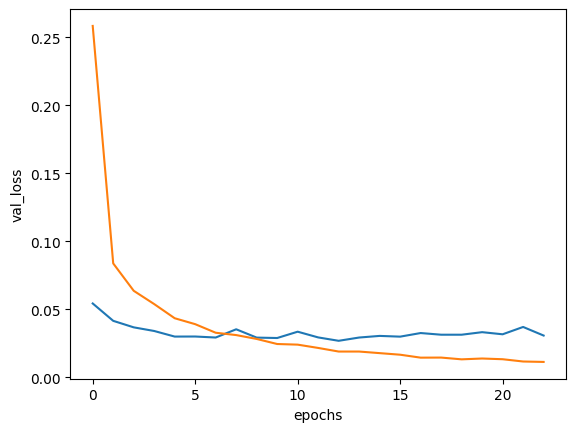

In [14]:
import pandas as pd
import seaborn as sns

accuracy =  history.history['accuracy']
loss =  history.history['loss']
val_accuracy =  history.history['val_accuracy']
val_loss =  history.history['val_loss']

# 데이터 프레임 생성
df = pd.DataFrame({'epochs' : range(len(accuracy)),
                   'accuracy': accuracy, 'loss': loss,
                   'val_accuracy': val_accuracy,
                    'val_loss': val_loss})

# epochs에 따른 loss값의 변화 시각화
sns.lineplot(x= df['epochs'], y = df['val_loss'])
sns.lineplot(x= df['epochs'], y = df['loss'])